<a href="https://colab.research.google.com/github/byrcewang/DL_SS2H/blob/main/CIFAR_10_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set a random seed for reproducibility
torch.manual_seed(42)

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define transformations and load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Take a 1% random sample of the training dataset
sample_size = int(0.01 * len(trainset))
trainset_small = torch.utils.data.random_split(trainset, [sample_size, len(trainset) - sample_size])[0]
trainloader_small = torch.utils.data.DataLoader(trainset_small, batch_size=64, shuffle=True)

# Initialize the CNN model
net = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader_small, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader_small)}')

print('Finished Training')

# Test the model on the full CIFAR-10 test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy}%')

Files already downloaded and verified
Epoch 1/10, Loss: 2.252691864967346
Epoch 2/10, Loss: 2.0016426742076874
Epoch 3/10, Loss: 1.8252795338630676
Epoch 4/10, Loss: 1.6404442340135574
Epoch 5/10, Loss: 1.5394284129142761
Epoch 6/10, Loss: 1.356231465935707
Epoch 7/10, Loss: 1.2118453085422516
Epoch 8/10, Loss: 1.095313973724842
Epoch 9/10, Loss: 0.9684373438358307
Epoch 10/10, Loss: 0.8647415861487389
Finished Training
Files already downloaded and verified
Accuracy on the test set: 33.65%


Files already downloaded and verified
Epoch 1/10, Loss: 2.2527, Accuracy: 14.80%
Epoch 2/10, Loss: 2.0016, Accuracy: 26.00%
Epoch 3/10, Loss: 1.8253, Accuracy: 35.40%
Epoch 4/10, Loss: 1.6404, Accuracy: 45.80%
Epoch 5/10, Loss: 1.5394, Accuracy: 47.20%
Epoch 6/10, Loss: 1.3562, Accuracy: 57.00%
Epoch 7/10, Loss: 1.2118, Accuracy: 62.60%
Epoch 8/10, Loss: 1.0953, Accuracy: 68.60%
Epoch 9/10, Loss: 0.9684, Accuracy: 73.40%
Epoch 10/10, Loss: 0.8647, Accuracy: 74.80%
Finished Training


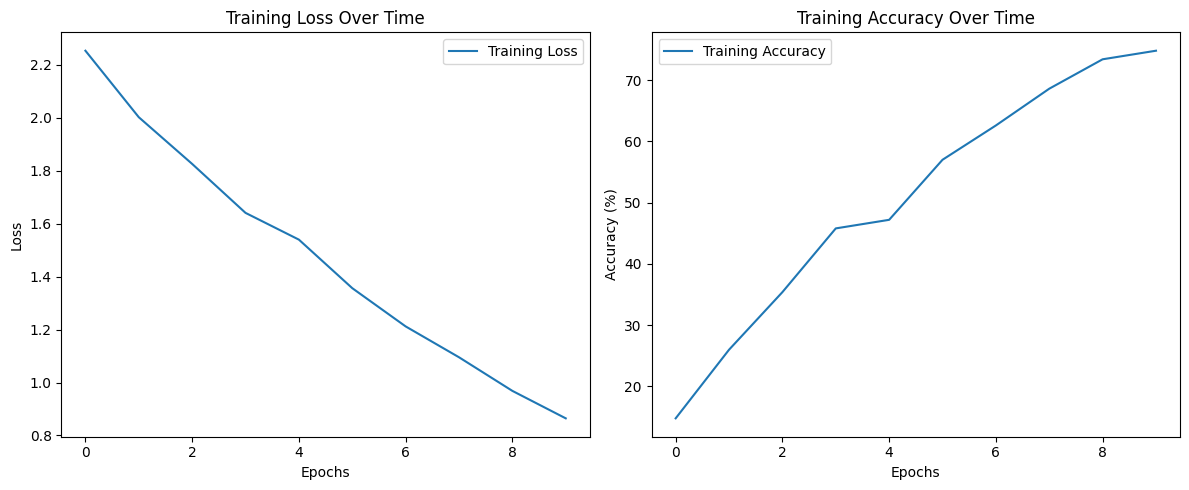

Files already downloaded and verified
Accuracy on the test set: 33.65%


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
torch.manual_seed(42)

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define transformations and load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Take a 1% random sample of the training dataset
sample_size = int(0.01 * len(trainset))
trainset_small = torch.utils.data.random_split(trainset, [sample_size, len(trainset) - sample_size])[0]
trainloader_small = torch.utils.data.DataLoader(trainset_small, batch_size=64, shuffle=True)

# Initialize the CNN model
net = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Lists to store training loss and accuracy
train_loss_history = []
train_accuracy_history = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader_small, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader_small)
    train_accuracy = 100 * correct / total

    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

print('Finished Training')

# Test the model on the full CIFAR-10 test set
# ... (same as provided)

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracy_history, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()


# Test the model on the full CIFAR-10 test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy}%')